In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('Car-Dataset.csv')

In [3]:
df.head()

,name,company,model,edition,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,Swift,Dzire VDI,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,190.000000,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid,1.5 TDI Ambition,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,250.000000,5.0,370000
2,Honda City 2017-2020 EXi,Honda,City,2017-2020 EXi,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,124.544455,5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,i20,Sportz Diesel,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,219.668960,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,Swift,VXI BSIII,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,112.776475,5.0,130000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   company        6926 non-null   object 
 2   model          6926 non-null   object 
 3   edition        6926 non-null   object 
 4   year           6926 non-null   int64  
 5   owner          6926 non-null   object 
 6   fuel           6926 non-null   object 
 7   seller_type    6926 non-null   object 
 8   transmission   6926 non-null   object 
 9   km_driven      6926 non-null   int64  
 10  mileage_mpg    6718 non-null   float64
 11  engine_cc      6718 non-null   float64
 12  max_power_bhp  6717 non-null   float64
 13  torque_nm      6717 non-null   float64
 14  seats          6718 non-null   float64
 15  selling_price  6926 non-null   int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 865.9+ KB


In [5]:
df.isnull().sum()

name               0
company            0
model              0
edition            0
year               0
owner              0
fuel               0
seller_type        0
transmission       0
km_driven          0
mileage_mpg      208
engine_cc        208
max_power_bhp    209
torque_nm        209
seats            208
selling_price      0
dtype: int64

In [6]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

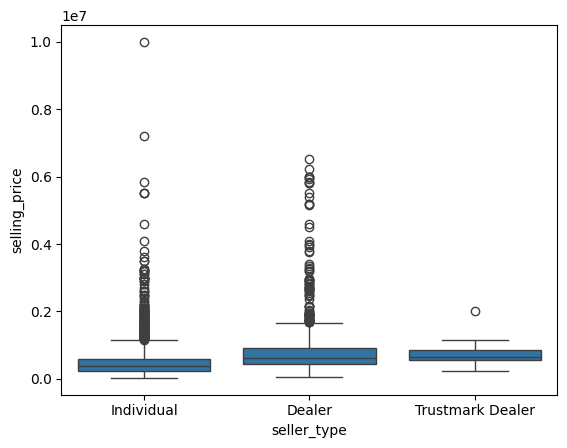

In [7]:

sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.show()


In [8]:
for col in df.select_dtypes(include='O').columns:
    print(f'Column:{col}')
    print(f'Cardinality:{df[col].nunique()}')
    print(df[col].unique())
    print(df[col].value_counts(normalize=True))
    print()

Column:name
Cardinality:2058
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
name
Maruti Swift Dzire VDI                          0.017037
Maruti Alto 800 LXI                             0.010973
Maruti Alto LXi                                 0.009962
Maruti Swift VDI                                0.008663
Maruti Swift VDI BSIV                           0.008085
                                                  ...   
Ford EcoSport 1.5 TDCi Titanium Plus BE BSIV    0.000144
Ford Figo 1.5 Sports Edition MT                 0.000144
Volkswagen Polo Select 1.2 MPI Highline         0.000144
Honda Jazz V Diesel                             0.000144
Renault Duster RXZ 110PS AMT BSIV               0.000144
Name: proportion, Length: 2058, dtype: float64

Column:company
Cardinality:32
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford

In [9]:
df = df.drop(columns=['name','model','edition'])
df.head()

,company,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
0,Maruti,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,190.000000,5.0,450000
1,Skoda,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,250.000000,5.0,370000
2,Honda,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,124.544455,5.0,158000
3,Hyundai,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,219.668960,5.0,225000
4,Maruti,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,112.776475,5.0,130000


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(6907, 13)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
X = df.drop(columns='selling_price')
y = df['selling_price']

In [14]:
X.shape,y.shape

((6907, 12), (6907,))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
X_train.shape

(5525, 12)

In [ ]:
numeric_cols = X_train.select_dtypes(include='number').columns.tolist()

In [18]:
numeric_cols

['year',
 'km_driven',
 'mileage_mpg',
 'engine_cc',
 'max_power_bhp',
 'torque_nm',
 'seats']

In [19]:
categorical_cols = X_train.select_dtypes(include='O').columns.tolist()

In [20]:
categorical_cols

['company', 'owner', 'fuel', 'seller_type', 'transmission']

In [21]:
numeric_cols

['year',
 'km_driven',
 'mileage_mpg',
 'engine_cc',
 'max_power_bhp',
 'torque_nm',
 'seats']

In [22]:
numeric_pip = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

])

categorical_pip = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_pip,numeric_cols),
    ('cat',categorical_pip,categorical_cols)
])

In [24]:
preprocessor.fit_transform(X_train)

array([[-0.34663648,  0.74073059, -1.58876246, ...,  0.        ,
         0.        ,  1.        ],
       [-0.5920448 ,  1.32832009, -1.69521801, ...,  0.        ,
         0.        ,  1.        ],
       [-0.34663648,  0.74073059, -0.71525667, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.88040513, -0.56502387, -0.39398904, ...,  0.        ,
         0.        ,  1.        ],
       [-0.10122816, -0.32019491, -0.48333566, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.12581345, -0.07536595,  1.0811807 , ...,  0.        ,
         0.        ,  1.        ]], shape=(5525, 51))

In [25]:
reg = RandomForestRegressor(
    n_estimators=10,
    max_depth=5,
    random_state=42
)

In [26]:
rf_model = Pipeline(steps=[
    ('pre',preprocessor),
    ('reg',reg)
])

In [27]:
rf_model.fit(X_train,y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('pre', ...), ('reg', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spar

In [28]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [29]:
train_rmse = root_mean_squared_error(y_train,y_train_pred)
test_rmse = root_mean_squared_error(y_test,y_test_pred)

In [30]:
print(train_rmse)
print(test_rmse)

169947.48964050272
172392.1313605195


In [31]:
param_dist = {
    "reg__n_estimators": [100, 200, 300, 500],
    "reg__max_depth": [None, 10, 20, 30, 50],
    "reg__min_samples_split": [2, 5, 10],
    "reg__min_samples_leaf": [1, 2, 4],
    "reg__max_features": ["sqrt", "log2", None]
}


In [32]:
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1,
    verbose=2,
    refit=True
)


In [33]:
rf_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'reg__max_depth': [None, 10, ...], 'reg__max_features': ['sqrt', 'log2', ...], 'reg__min_samples_leaf': [1, 2, ...], 'reg__min_samples_split': [2, 5, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",30
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the various

In [34]:
print("Best Params:")
print(rf_search.best_params_)

best_model = rf_search.best_estimator_


Best Params:
{'reg__n_estimators': 500, 'reg__min_samples_split': 2, 'reg__min_samples_leaf': 1, 'reg__max_features': None, 'reg__max_depth': None}


In [35]:
best_model = rf_search.best_estimator_

y_test_pred_tuned = best_model.predict(X_test)
tuned_rmse = root_mean_squared_error(y_test, y_test_pred_tuned)

print("Tuned Test RMSE:", tuned_rmse)


Tuned Test RMSE: 125697.66131492986


In [36]:
comparison = pd.DataFrame({
    "Model": ["Pre-tuned RF", "Tuned RF"],
    "Test_RMSE": [test_rmse, tuned_rmse]
})

comparison


,Model,Test_RMSE
0,Pre-tuned RF,172392.131361
1,Tuned RF,125697.661315


In [37]:
xgb = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    tree_method="hist",   # 🔥 GPU
    device="cuda",
    random_state=42
)


In [38]:
xgb_model = Pipeline(steps=[
    ("pre", preprocessor),
    ("reg", xgb)
])


In [39]:
import time

start = time.perf_counter()
xgb_model.fit(X_train, y_train)
xgb_train_time = time.perf_counter() - start

print(f"XGBoost GPU Training Time: {xgb_train_time:.2f} seconds")


XGBoost GPU Training Time: 3.42 seconds


In [40]:
xgb_pred = xgb_model.predict(X_test)
xgb_rmse = root_mean_squared_error(y_test, xgb_pred)

c:\Users\Shounak\OneDrive\Desktop\FastAPI-Project\FirstProject\venv\Lib\site-packages\xgboost\core.py:774: UserWarning: [21:02:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


In [41]:
comparison = pd.DataFrame({
    "Model": ["Tuned RandomForest", "XGBoost GPU"],
    "Test_RMSE": [tuned_rmse, xgb_rmse]
})

comparison


,Model,Test_RMSE
0,Tuned RandomForest,125697.661315
1,XGBoost GPU,122810.484375
